In [1]:
import numpy as np
import pickle
import lzma

import elephant.statistics as estats
import elephant
import neo
from quantities import ms, s, Hz

from elephant.spike_train_dissimilarity import victor_purpura_distance
from elephant.spike_train_dissimilarity import van_rossum_distance

import pandas as pd
import matplotlib.pyplot as plt

import multiprocessing



In [2]:
layercount_lst = []
MeanDelay_lst = []
stdDelay_lst = []
meanVP_lst = []
meanVR_lst = []
nthlayer_lst = []
for layercount in [30, 50, 60]:
    for MeanDelay_noround in np.arange(2, 3.01, 0.2):
        MeanDelay = np.round(MeanDelay_noround,1)
        for stdDelay_noround in np.arange(0, 1.01, 0.05):
            stdDelay = np.round(stdDelay_noround,2)
            with open('./VP_processing/FeedForward_layercount'+str(layercount)+'_meandelay'+str(MeanDelay)+'_stddelay'+str(stdDelay)+'_qum0.1_VP.pkl', 'rb') as f:
                output_lst = pickle.load(f)
                meanVP = pd.DataFrame(np.vstack(output_lst)).mean()
            with open('./VR_processing/FeedForward_layercount'+str(layercount)+'_meandelay'+str(MeanDelay)+'_stddelay'+str(stdDelay)+'_tau0.01_VR.pkl', 'rb') as f:
                output_lst = pickle.load(f)
                meanVR = pd.DataFrame(np.vstack(output_lst)).mean()
            for nthlayer in range(10):
                layercount_lst.append(layercount)
                MeanDelay_lst.append(MeanDelay)
                stdDelay_lst.append(stdDelay)
                meanVP_lst.append(meanVP[nthlayer])
                meanVR_lst.append(meanVR[nthlayer])
                nthlayer_lst.append(nthlayer)
                

df = pd.DataFrame(list(zip(layercount_lst, MeanDelay_lst, stdDelay_lst, nthlayer_lst, meanVP_lst, meanVR_lst)),
                  columns =['LayerCount', 'MeanDelay', 'StdDelay', 'NthLayer', 'VP', 'VR'])

In [3]:
df.head()

,LayerCount,MeanDelay,StdDelay,NthLayer,VP,VR
0,30,2.0,0.0,0,0.0,2.000935e-10+2.525349e-10j
1,30,2.0,0.0,1,0.0,3.246796e-10+3.267184e-10j
2,30,2.0,0.0,2,0.0,3.841013e-10+3.621966e-10j
3,30,2.0,0.0,3,0.0,4.358288e-10+4.256377e-10j
4,30,2.0,0.0,4,0.0,4.024136e-10+3.514957e-10j


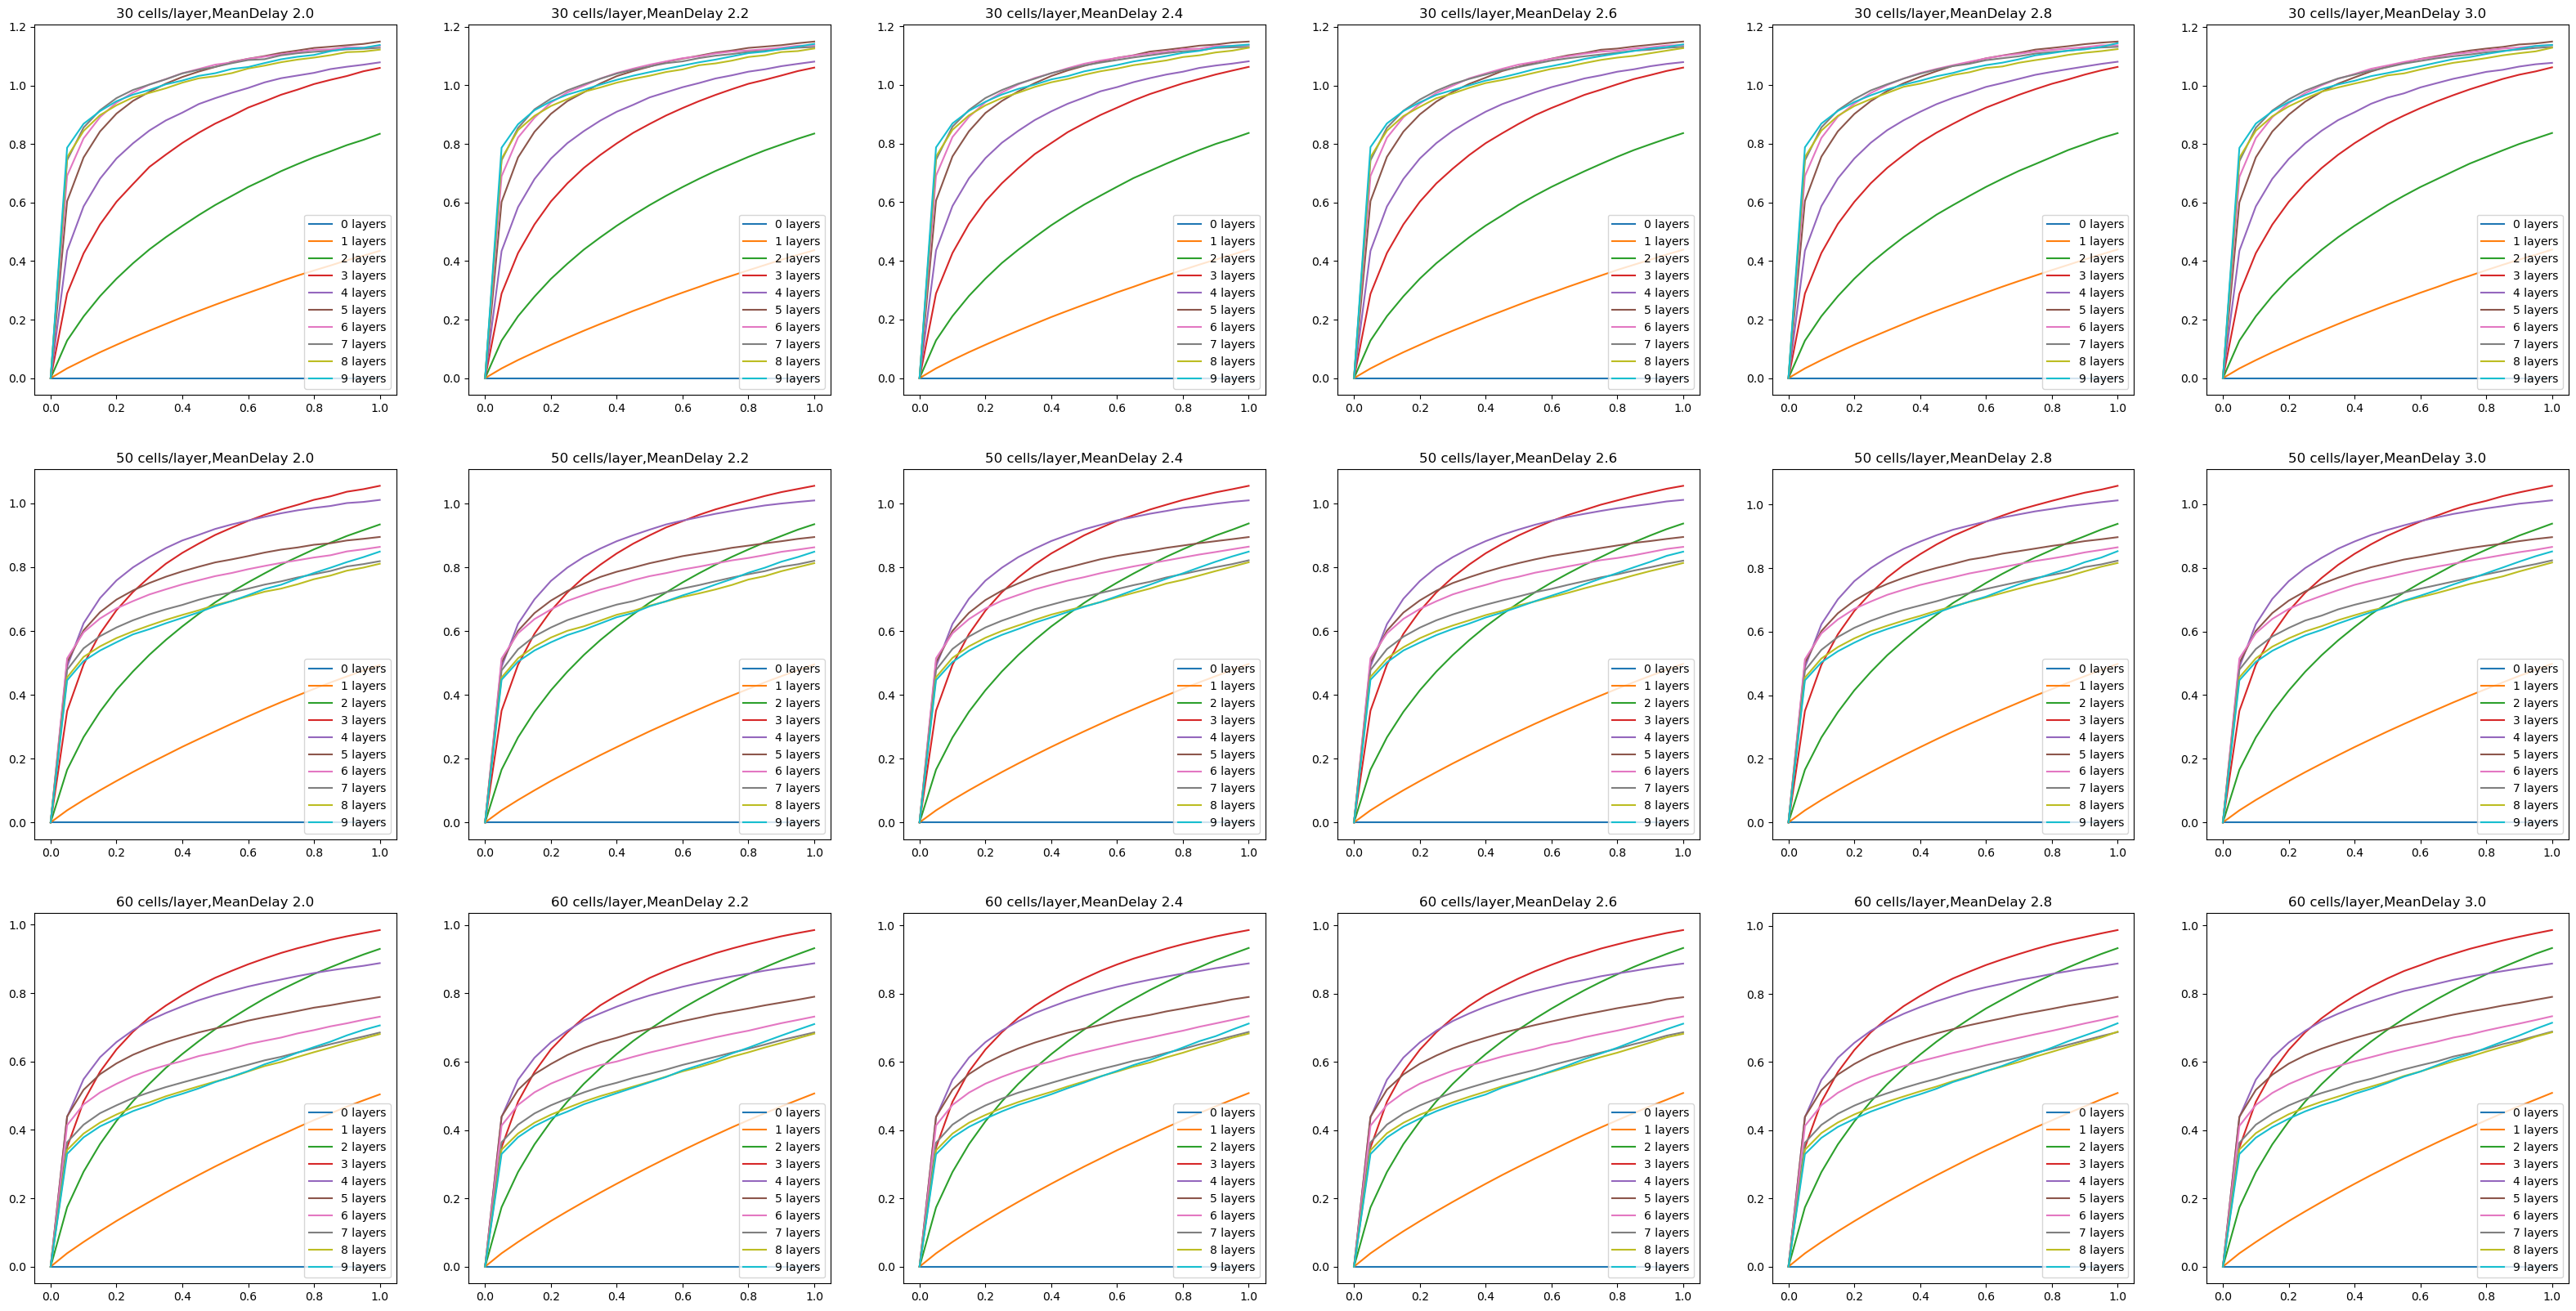

In [4]:
std_delay_lst = []
for stdDelay_noround in np.arange(0.0, 1.01, 0.05):
        stdDelay = np.round(stdDelay_noround,2)
        std_delay_lst.append(stdDelay)

# for cost = 0/ms but missing is 1
fig, axs = plt.subplots(3, 6, figsize=(40, 20))
counter_i = -1
for layercount in [30, 50, 60]:
    counter_i += 1 
    counter_j = -1
    for MeanDelay_noround in np.arange(2, 3.01, 0.2):
        MeanDelay = np.round(MeanDelay_noround,1)
        counter_j += 1
        for nlayer in np.arange(0, 10):
            # y = df.loc[(df['LayerCount'] == layercount) & (df['MeanDelay'] == MeanDelay) & (df['NthLayer'] == nlayer), 'VP'].values[0]
            y = df.loc[(df['LayerCount'] == layercount) & (df['MeanDelay'] == MeanDelay) & (df['NthLayer'] == nlayer), :].sort_values(by ='StdDelay')['VP']
            axs[counter_i, counter_j].plot(std_delay_lst, y,  label=str(nlayer) + ' layers')
            axs[counter_i, counter_j].set_title('{} cells/layer,MeanDelay {}'.format(layercount, MeanDelay))
            axs[counter_i, counter_j].legend()

/gpfs/gibbs/project/mcdougal/rh882/conda_envs/py3_env/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


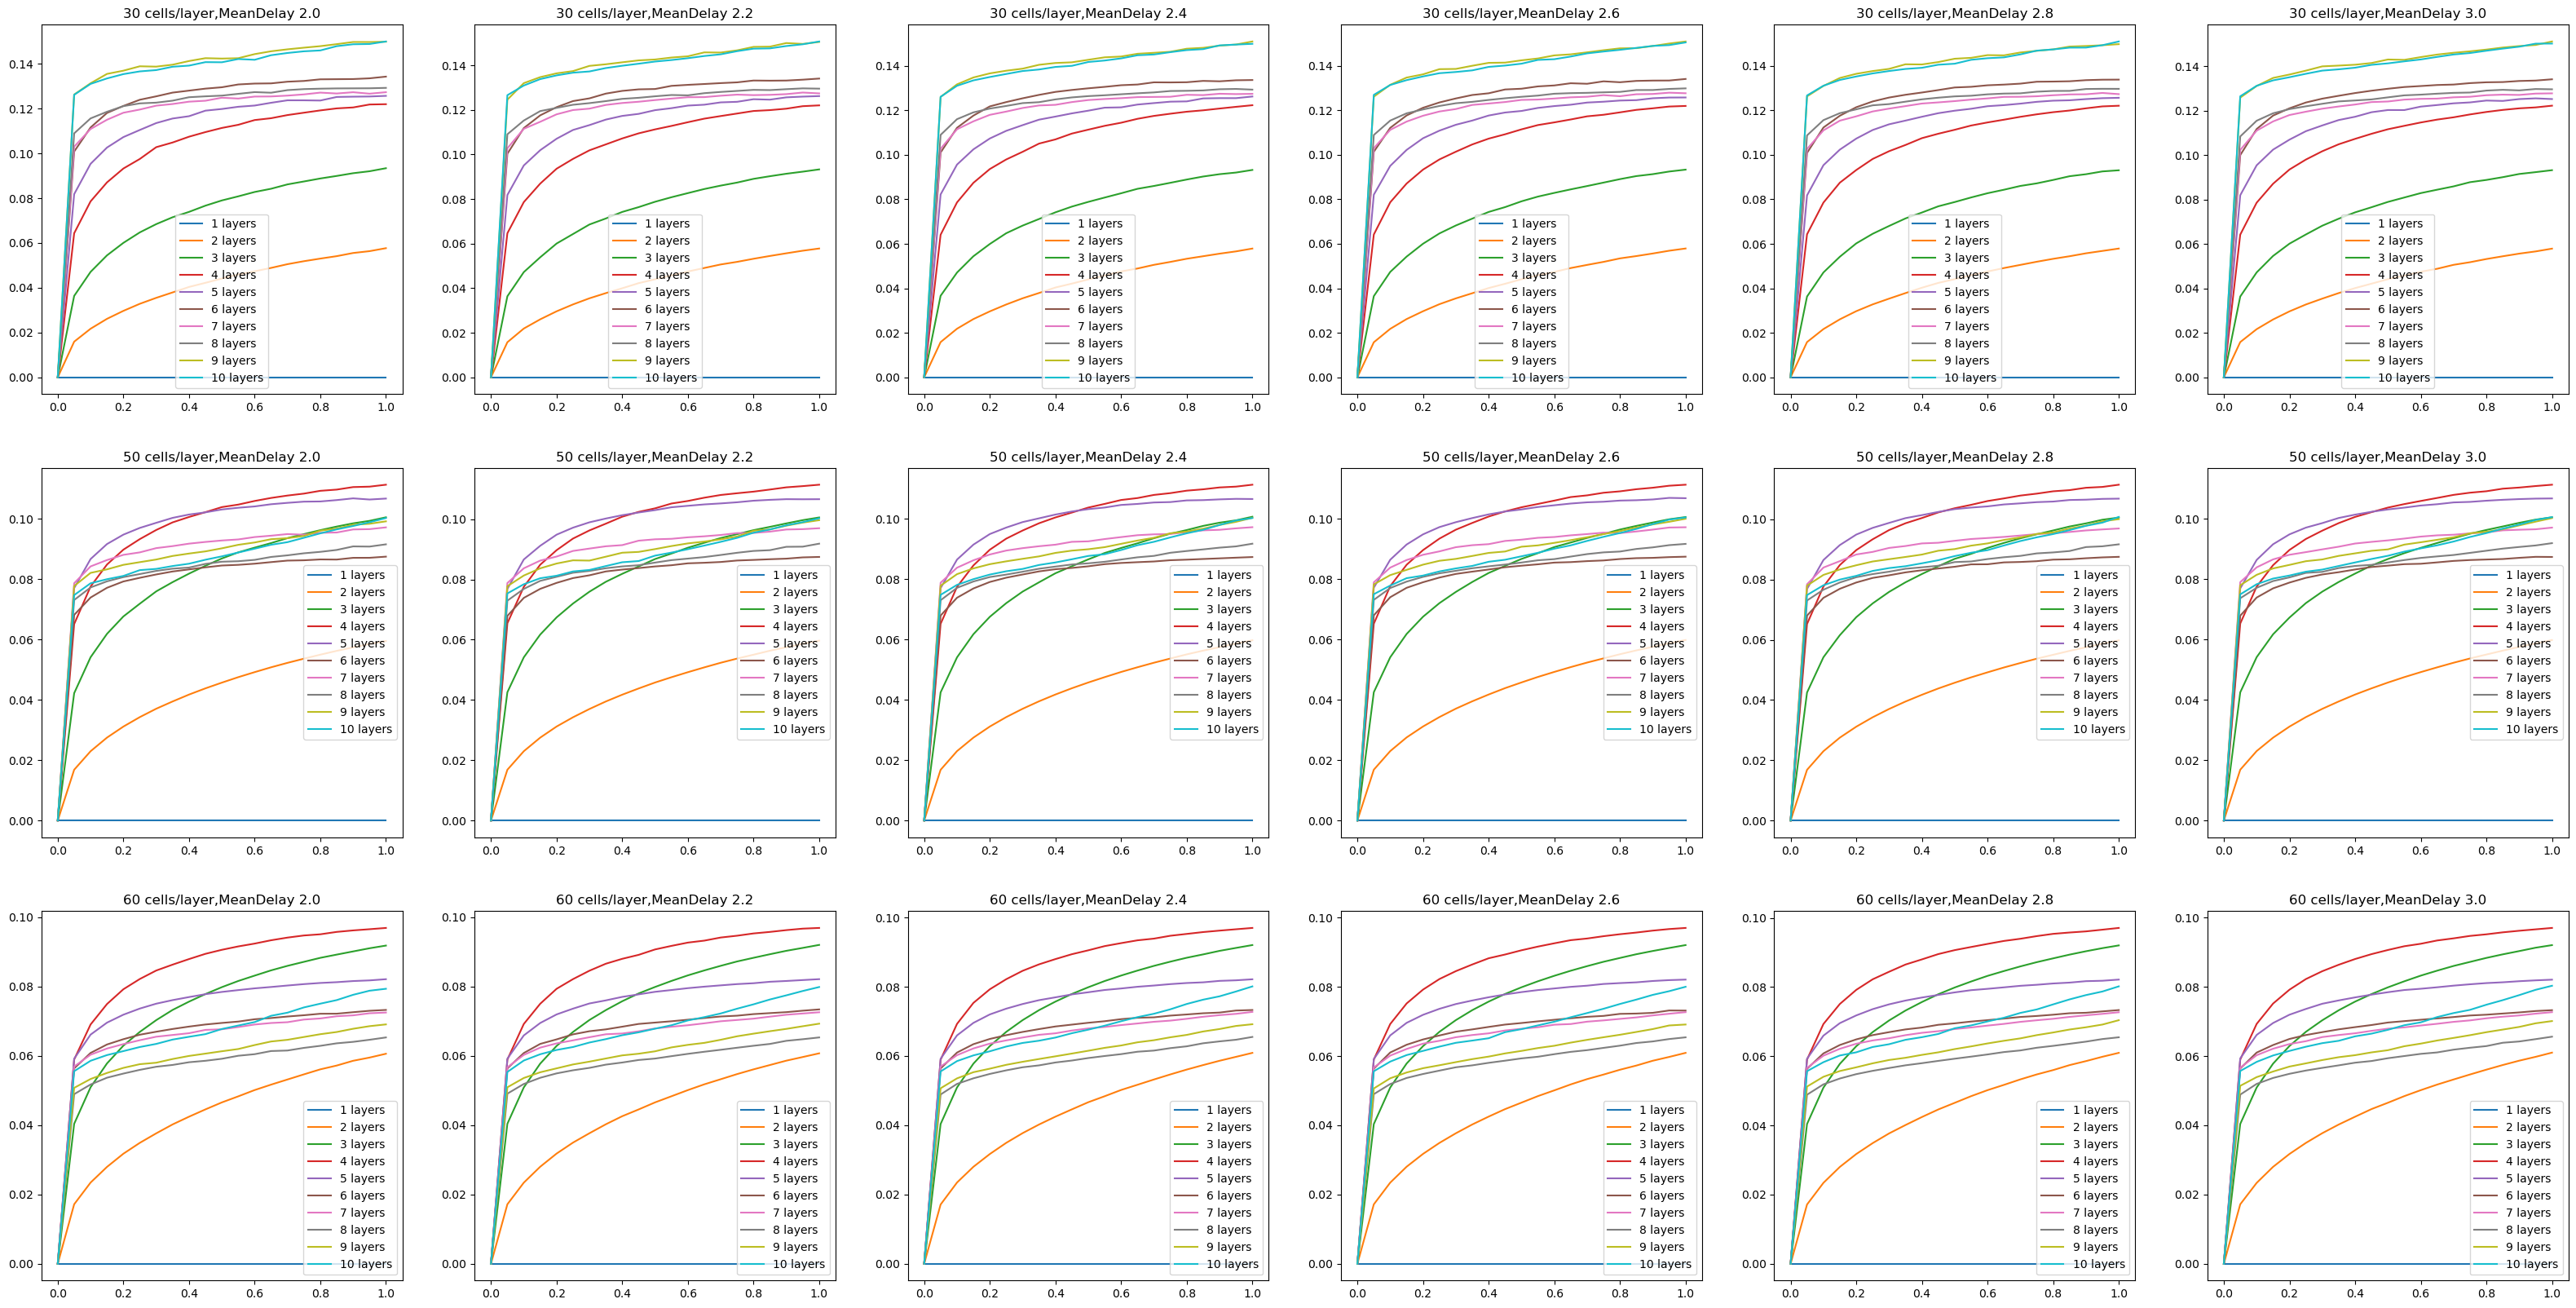

In [5]:
std_delay_lst = []
for stdDelay_noround in np.arange(0.0, 1.01, 0.05):
        stdDelay = np.round(stdDelay_noround,2)
        std_delay_lst.append(stdDelay)

# for cost = 0/ms but missing is 1
fig, axs = plt.subplots(3, 6, figsize=(40, 20))
counter_i = -1
for layercount in [30, 50, 60]:
    counter_i += 1 
    counter_j = -1
    for MeanDelay_noround in np.arange(2, 3.01, 0.2):
        MeanDelay = np.round(MeanDelay_noround,1)
        counter_j += 1
        for nlayer in np.arange(0, 10):
            # y = df.loc[(df['LayerCount'] == layercount) & (df['MeanDelay'] == MeanDelay) & (df['NthLayer'] == nlayer), 'VP'].values[0]
            y = df.loc[(df['LayerCount'] == layercount) & (df['MeanDelay'] == MeanDelay) & (df['NthLayer'] == nlayer), :].sort_values(by ='StdDelay')['VR']
            axs[counter_i, counter_j].plot(std_delay_lst, y,  label=str(nlayer + 1) + ' layers')
            axs[counter_i, counter_j].set_title('{} cells/layer,MeanDelay {}'.format(layercount, MeanDelay))
            axs[counter_i, counter_j].legend()